In [ ]:
# dataset is of Social_netwrok_add impacted on target class of not

In [ ]:
#used naviy bayes to get exact prob

# Importing the Libraries and read the data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
#reading and overview of the data

In [9]:
soc=pd.read_csv("F:\\DATA SCIENCE\\python\\py\\ALGORITHMS\\Naivy bayes\\Social_Network_Ads.csv")
soc.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
soc.shape


(400, 5)

In [16]:
soc.head(5)
soc.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


# EDA
   

In [21]:
#drop unwanted cols
soc=soc.drop('User ID',axis=1)
soc


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [22]:
#Label encode the columns
soc['Gender'][soc.Gender=='Male']=0
soc['Gender'][soc.Gender=='Female']=1

<ipython-input-22-6ea0e737fae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soc['Gender'][soc.Gender=='Male']=0
<ipython-input-22-6ea0e737fae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soc['Gender'][soc.Gender=='Female']=1


In [23]:
soc
soc.head(5)
soc.tail(5)

,Gender,Age,EstimatedSalary,Purchased
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0
399,1,49,36000,1


heck for zeros <br>
hekc for nulls

<AxesSubplot:>

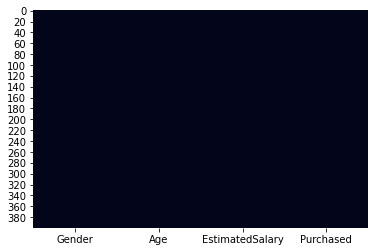

In [24]:
sns.heatmap(soc.isnull(),cbar=False)
#so thereis no any nulls in data
#convert the data into stander scaler formqe

In [25]:
data_std=soc.copy()
sc=StandardScaler()
vals=sc.fit_transform(data_std.iloc[:,:])
data_std.iloc[:,:]=vals

#Restore the value of y in actual y

In [26]:
data_std.Purchased=soc.Purchased
data_std

,Gender,Age,EstimatedSalary,Purchased
0,-1.020204,-1.781797,-1.490046,0
1,-1.020204,-0.253587,-1.460681,0
2,0.980196,-1.113206,-0.785290,0
3,0.980196,-1.017692,-0.374182,0
4,-1.020204,-1.781797,0.183751,0
...,...,...,...,...
395,0.980196,0.797057,-0.844019,1
396,-1.020204,1.274623,-1.372587,1
397,0.980196,1.179110,-1.460681,1
398,-1.020204,-0.158074,-1.078938,0


# Splitting of the data now

In [27]:
trainx,testx,trainy,testy=train_test_split(data_std.drop('Purchased',axis=1), 
                                            data_std.Purchased,
                                            test_size=0.2)
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

(320, 3) (320,) (80, 3) (80,)


# Building of model of Naivy Bayes

In [28]:
m1=GaussianNB().fit(trainx,trainy)
p1=m1.predict(testx)

# Accuracy score

In [29]:
accuracy_score(testy, p1)

0.9125

# Confusion matrix

In [30]:
df=pd.DataFrame({'actual':testy,'pred':p1})
df
pd.crosstab(df.actual, df.pred,margins=True)

pred,0,1,All
actual,,,
0,51,4,55
1,3,22,25
All,54,26,80


lassification report

In [31]:
print(classification_report(testy,p1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.85      0.88      0.86        25

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [34]:
#so here we get the exact 91 % accuracy 
re=pd.DataFrame({'actual':testy,'predicted':p1})

In [35]:
re

,actual,predicted
321,1,1
385,1,1
22,1,1
157,0,0
95,0,0
...,...,...
396,1,1
319,0,0
209,0,1
174,0,0


In [36]:
#so 91 % of 400 
400*0.91

364.0

# 364 peoples click the social media add and 36 peoples are not clicked